In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_berlin_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('berlin')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/berlin_{date}.csv',index=False)
get_listings_berlin_timeseries()

In [3]:
# pull in detailed_listings
raw_df_berlin = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_berlin)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(berlin_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17499 AirBnb listings.


In [4]:
berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
berlin_raw_df_12_12_2020.shape





(20224, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for berlin
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_berlin = glob.glob('berlin/**.csv')
files_berlin

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['berlin/Berlin_2020-12.csv',
 'berlin/Berlin_2021-09.csv',
 'berlin/Berlin_2021-08.csv',
 'berlin/Berlin_2021-01.csv',
 'berlin/Berlin_2021-03.csv',
 'berlin/Berlin_2021-02.csv',
 'berlin/Berlin_2021-06.csv',
 'berlin/Berlin_2021-07.csv',
 'berlin/Berlin_2021-10.csv',
 'berlin/Berlin_2021-04.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(berlin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(berlin_raw_df_12_12_2020['price'].mean(),2)}.")

berlin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(berlin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_1_9_2021['price'].mean(),2)}.")

berlin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(berlin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_2_8_2021['price'].mean(),2)}.")

berlin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(berlin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_3_4_2021['price'].mean(),2)}.")

berlin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(berlin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_4_9_2021['price'].mean(),2)}.")

#berlin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(berlin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_5_19_2021['price'].mean(),2)}.")

berlin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(berlin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_6_3_2021['price'].mean(),2)}.")

berlin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(berlin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_7_4_2021['price'].mean(),2)}.")

berlin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(berlin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_8_6_2021['price'].mean(),2)}.")

berlin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(berlin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_9_7_2021['price'].mean(),2)}.")

berlin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(berlin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_10_6_2021['price'].mean(),2)}.")

#berlin_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(berlin_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20224 AirBnb listings; the avg price is €72.95.
The 1_9_2021 dataset contains 20050 AirBnb listings; the avg price is €70.29.
The 2_8_2021 dataset contains 19978 AirBnb listings; the avg price is €70.56.
The 3_4_2021 dataset contains 19858 AirBnb listings; the avg price is €70.78.
The 4_9_2021 dataset contains 19752 AirBnb listings; the avg price is €72.55.
The 6_3_2021 dataset contains 18978 AirBnb listings; the avg price is €73.54.
The 7_4_2021 dataset contains 19095 AirBnb listings; the avg price is €73.3.
The 8_6_2021 dataset contains 18547 AirBnb listings; the avg price is €74.48.
The 9_7_2021 dataset contains 18288 AirBnb listings; the avg price is €75.19.
The 10_6_2021 dataset contains 17500 AirBnb listings; the avg price is €74.9.


In [7]:
df_list_berlin = [berlin_raw_df_12_12_2020, berlin_raw_df_1_9_2021, berlin_raw_df_2_8_2021,
           berlin_raw_df_3_4_2021, berlin_raw_df_4_9_2021,  berlin_raw_df_6_3_2021, berlin_raw_df_7_4_2021,
           berlin_raw_df_8_6_2021, berlin_raw_df_9_7_2021, berlin_raw_df_10_6_2021]

dates_berlin = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_berlin = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_berlin = []

def airbnb_parse_berlin(df_list, files):
    for file in files_berlin:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_{file}.csv")
        print(f"The {file} berlin dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_berlin(df_list, dates):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_{file}.csv")
        #print(f"The {date} berlin dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_berlin.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_berlin)

berlin_parse = airbnb_parse_berlin(df_list_berlin, files_berlin)


The 2020-12 berlin dataset contains 20224 AirBnb listings -- the avg price is €72.95.
The 2021-01 berlin dataset contains 20050 AirBnb listings -- the avg price is €70.29.
The 2021-02 berlin dataset contains 19978 AirBnb listings -- the avg price is €70.56.
The 2021-03 berlin dataset contains 19858 AirBnb listings -- the avg price is €70.78.
The 2021-04 berlin dataset contains 19752 AirBnb listings -- the avg price is €72.55.
The 2021-06 berlin dataset contains 18978 AirBnb listings -- the avg price is €73.54.
The 2021-07 berlin dataset contains 19095 AirBnb listings -- the avg price is €73.3.
The 2021-08 berlin dataset contains 18547 AirBnb listings -- the avg price is €74.48.
The 2021-09 berlin dataset contains 18288 AirBnb listings -- the avg price is €75.19.
The 2021-10 berlin dataset contains 17500 AirBnb listings -- the avg price is €74.9.


In [8]:
berlin_summary = airbnb_to_frame_berlin(df_list_berlin, files_berlin)
berlin_summary['Date of scrape'] = pd.to_datetime(berlin_summary['Date of scrape'])
berlin_summary['City'] = 'berlin'
berlin_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,20224,72.95,50.0,0,8000,0.75,berlin
1,2021-01-01,20050,70.29,50.0,0,8000,0.72,berlin
2,2021-02-01,19978,70.56,50.0,0,8000,0.69,berlin
3,2021-03-01,19858,70.78,50.0,0,8000,0.67,berlin
4,2021-04-01,19752,72.55,50.0,0,8000,0.66,berlin
5,2021-06-01,18978,73.54,52.0,0,8000,0.71,berlin
6,2021-07-01,19095,73.30,52.0,0,8000,0.72,berlin
7,2021-08-01,18547,74.48,55.0,0,8000,0.79,berlin
8,2021-09-01,18288,75.19,55.0,0,8000,0.82,berlin
9,2021-10-01,17500,74.90,55.0,0,8000,0.81,berlin


In [9]:
berlin_summary_listings = berlin_summary[['Date of scrape','# of Listings']]
berlin_summary_listings.set_index('Date of scrape', inplace=True)


berlin_summary_prices_avg = berlin_summary[['Date of scrape', 'Avg Price']]
berlin_summary_prices_avg.set_index('Date of scrape', inplace=True)

berlin_summary_prices_median = berlin_summary[['Date of scrape', 'Median Price']]
berlin_summary_prices_median.set_index('Date of scrape', inplace=True)

berlin_summary_reviews_permonth = berlin_summary[['Date of scrape', 'Avg reviews per month']]
berlin_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

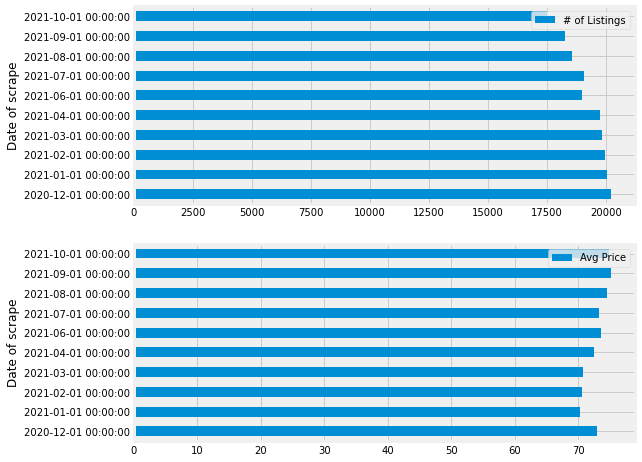

In [10]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

berlin_summary_listings.plot(ax=ax1, kind='barh')
berlin_summary_prices_avg.plot(ax=ax2, kind='barh')

In [10]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

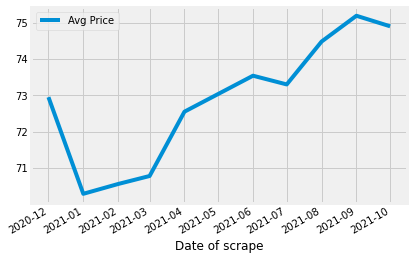

In [11]:
berlin_summary.plot(x='Date of scrape', y='Avg Price')

In [12]:
master_df_berlin = pd.concat(df_list_berlin)
master_df_berlin = master_df_berlin[master_df_berlin['room_type']=='Entire home/apt']
master_df_berlin_unique = master_df_berlin.drop_duplicates(subset='id')
#master_df_berlin_unique = master_df_berlin[master_df_berlin_unique['room_type']=='Entire home/apt']
master_df_berlin_unique['room_type'].value_counts()

Entire home/apt    14164
Name: room_type, dtype: int64

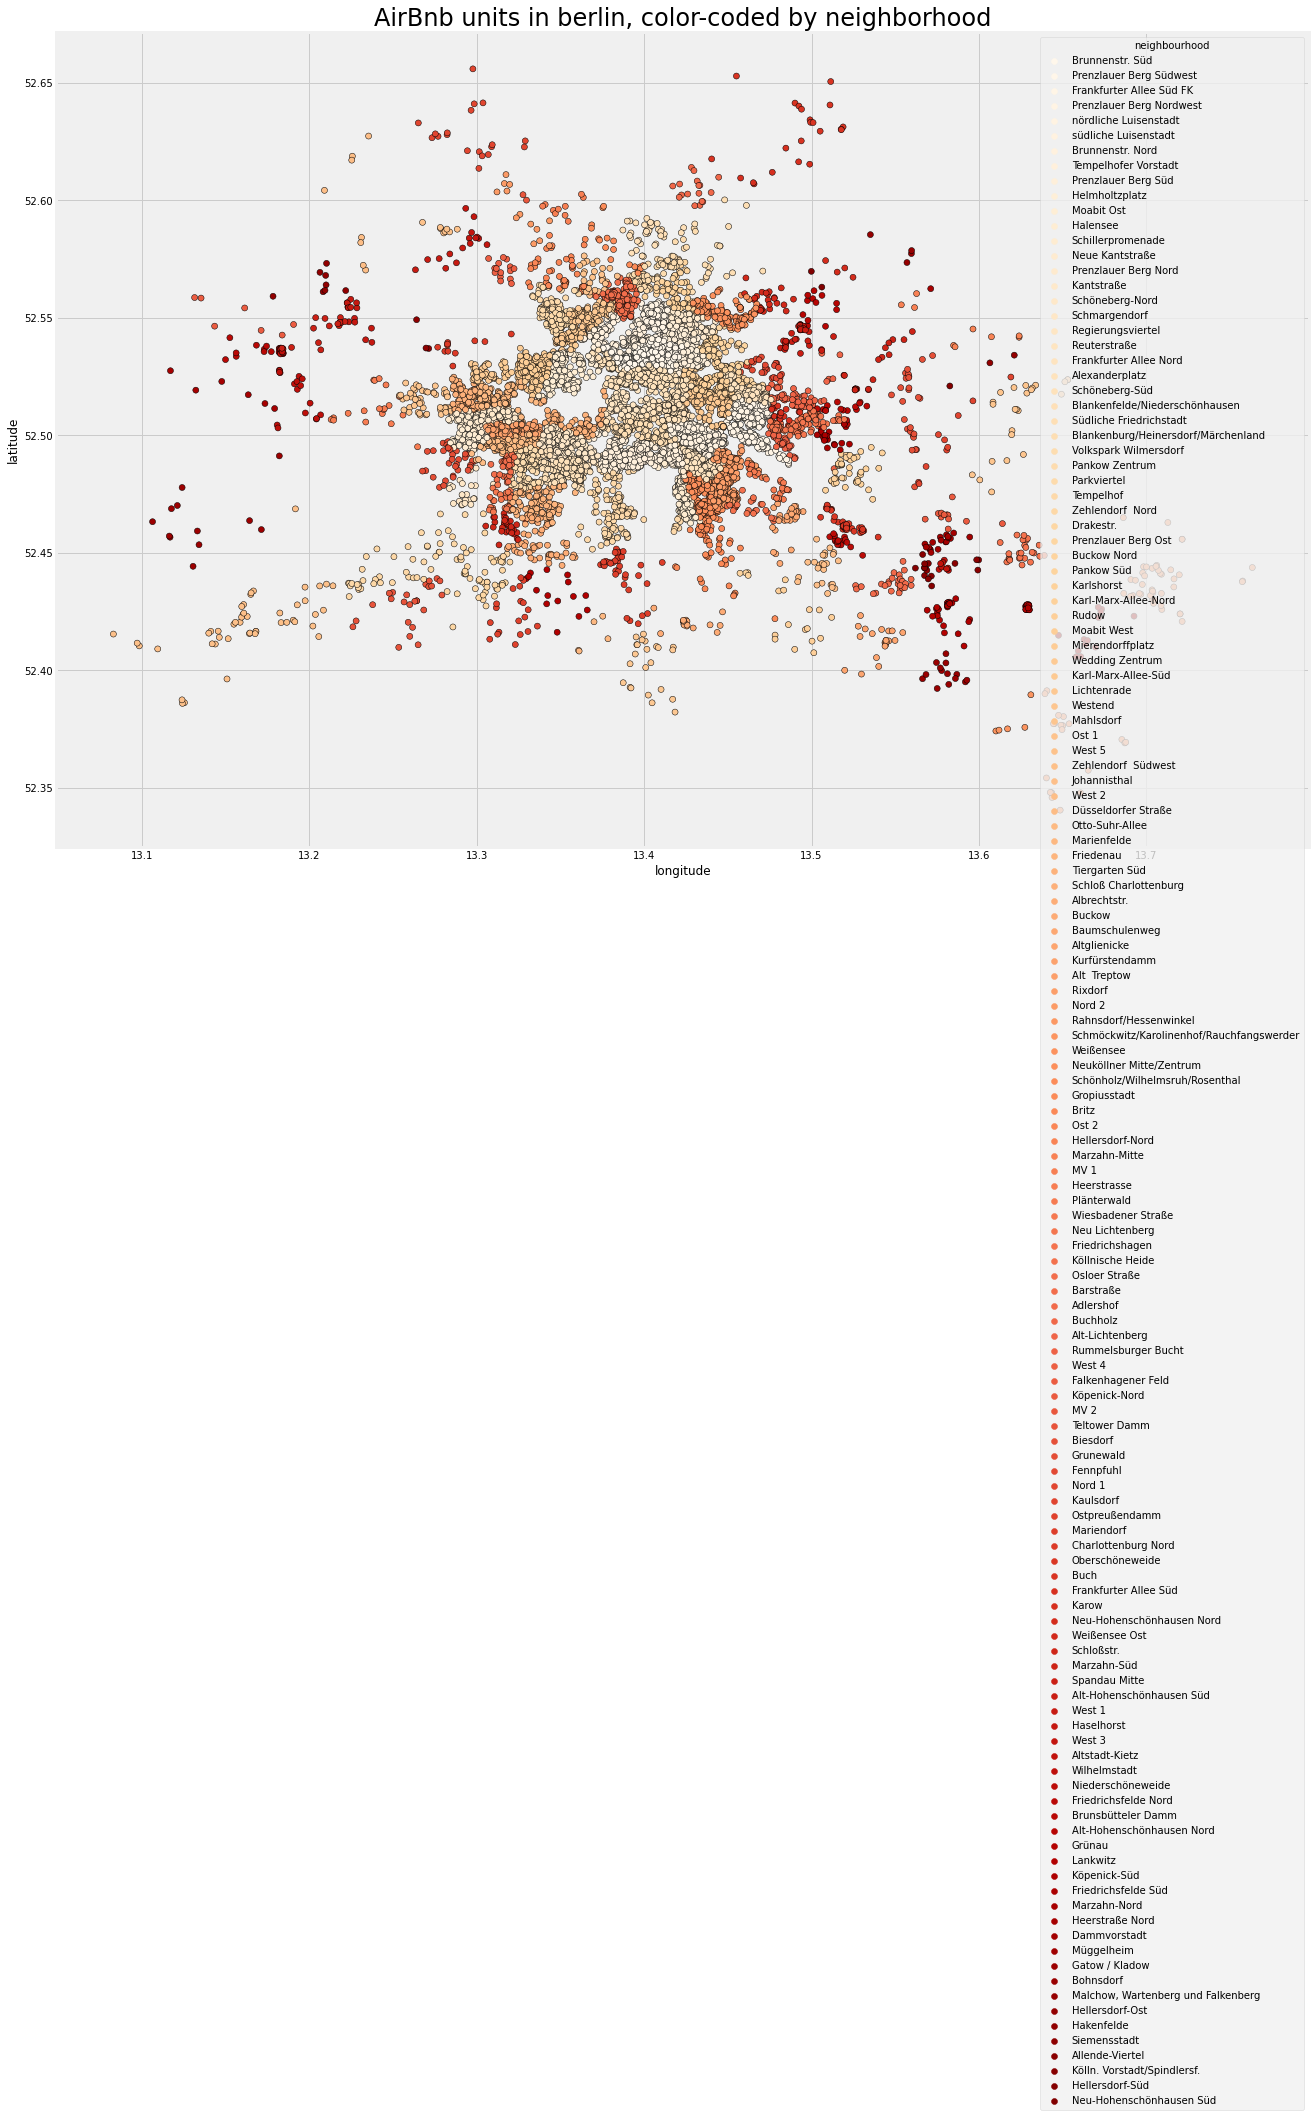

In [13]:
title = 'AirBnb units in berlin, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_berlin_unique.longitude, master_df_berlin_unique.latitude, hue = master_df_berlin_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_berlin.png')
plt.show()

## Add review data through a join

In [14]:
df_reviews = pd.concat([berlin_raw_df_10_6_2021,raw_df_berlin],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(9891, 75)

## Regression

In [15]:
#df_reviews_.columns

In [16]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [17]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -22.77124097487473
Coefficients:  [ 5.45211332 22.73493378 -1.20424979  0.43741819  0.1829057  -3.02468298
 12.46429346 13.09550698 -9.86057673]
LinearRegression()


In [18]:
y_pred2 = regr.predict(X_)

In [19]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(7138, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

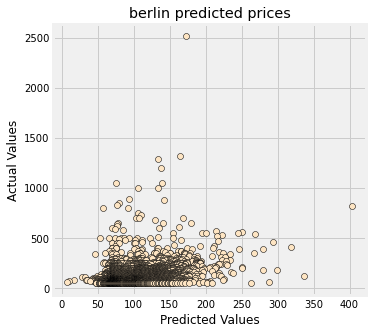

In [20]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('berlin predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [21]:
df_result.index

Int64Index([ 7090, 10241, 10242,  9473, 14198,  5771, 12629, 11221, 14711,
            14338,
            ...
            14159, 11869, 15107, 12921, 12108, 14923, 17473, 14806, 15405,
            14904],
           dtype='int64', length=7138)

In [22]:
raw_df_berlin.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20211021214629,2021-10-22,Fabulous Flat in great Location,"This beautiful first floor apartment is situated at Kollwitzplatz.<br />Its ideal for 2 but can comfortably accommodate 4 with the extra double bed in the living room.<br /><br />PLEASE INQUIRE FIRST BEFORE MAKING A BOOKING. THANKS<br /><br /><b>The space</b><br />1st floor (68m2) apartment on Kollwitzplatz/ Prenzlauer Berg.<br /><br />It's ideal for 2 but can sleep comfortably an extra 2 in the living room. (Please let us know in advance if you are 2 people sleeping separately that we can bring extra sheet for you.)<br />Kids are welcome and for smaller visitors we can arrange baby cot and high chair.<br /><br />The front room is spacious and open plain with a large dining table, parquet flooring and a simple yet stylish décor.<br />You can relax in an Indian easy chair or simply lounge on the daybed.<br /><br />The kitchen area has everything from frying pan to coffee maker, an electric oven and stove, refrigerator.<br /><br />To the back of the apartment is the bedroom with a lar","The neighbourhood is famous for its variety of international eateries, pubs, restaurants, cafés, galleries and little shops.<br />The bakery next door is open everyday from up 7 am, which makes warm croissants for breakfast very tempting.<br /><br />On Sundays don't miss the traditional flea markets on Arkonaplatz and in the nearby Mauerpark for special treats and souvenirs. <br /><br /><br />check out our travel guide and please let us know what your highlights were so we can add them for future guests",https://a0.muscache.com/pictures/243355/84afcff6_original.jpg,3718,https://www.airbnb.com/users/show/3718,...,4.69,4.92,4.63,NaN,f,1,1,0,0,1.11
1,7071,https://www.airbnb.com/rooms/7071,20211021214629,2021-10-22,BrightRoom with sunny greenview!,"Cozy and large room in the beautiful district Prenzlauer Berg.<br /><br /><b>The space</b><br />The BrightRoom is an approx. 20 sqm (215ft²), beautiful and quiet room with view on a sunny green backyard.<br />The guest room is discreetly furnished and offers you to integrate your brought stuff homely. It has a queensize-bed and a single person bed in it. So, couples as well as friends can stay in the room. A clean room and a good bed are a matter of course.<br />(+ wireless internet)<br />There is an additional 27.- Euro for the second person/night.<br />It is part of my private apartment in the second floor with a total of three rooms and a shared bathroom. <br /><br />Beautiful location in the district Prenzlauer Berg not far from Berlin Mitte.<br />There are numerous entertainment options in the neighborhood: lively bars, cafés, tasty restaurants in different price ranges and lots more. <br /><br />Around the corner is the subway station Eberswalderstrasse, as well as a tram station","Great neighborhood with plenty of Cafés, Bakeries, Diners, Restaurants, Bars, Beautiful Shops and Supermarkets (conventional & organic). Also at a stone's throw away is an old (but renovated) brewery area with Clubs, Theater and Cinema. In every street is more than one ""Späti"" the famous late night stores for food, tobacco, drinks and more.. If you have children you will be amazed about the many playgrounds!",https://a0.muscache.com/pictures/21278/32a1622d_original.jpg,17391,https://www.airbnb.com/users/show/17391,...,4.85,4.91,4.71,NaN,t,1,0,1,0,2.38
2,9991,https://www.airbnb.com/rooms/9991,20211021214629,2021-10-22,Geourgeous flat - outstanding views,"4 bedroom with very large windows and outstanding views of Mitte is great for families or

In [23]:
df_result['id'] = df_result.index.values
df_result.shape

(7138, 4)

In [24]:
raw_df_berlin.index.values
df_result.index.values

array([ 7090, 10241, 10242, ..., 14806, 15405, 14904])

In [25]:
df_result_merge = df_result.merge(raw_df_berlin, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(17499, 77)

In [26]:
df_join = df_result.join(raw_df_berlin, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                             0
Predicted                                          0
Diff                                               0
id_x                                               0
id_y                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1187
Length: 78, dtype: int64

In [27]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [28]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_berlin = df_print[df_print['Predicted']>0]
df_print_berlin.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
7090,7090,2517,"$2,517.00",173.217395,-2343.782605,https://www.airbnb.com/rooms/19961235,52.52267,13.39935,6,Alexanderplatz,5.0,5.0,5.0,5.0,5.0,5.0,4.75,8
10241,10241,1289,"$1,289.00",133.943158,-1155.056842,https://www.airbnb.com/rooms/29022451,52.53124,13.40085,4,Brunnenstr. Süd,5.0,5.0,5.0,5.0,5.0,5.0,5.00,1
10242,10242,1317,"$1,317.00",164.635863,-1152.364137,https://www.airbnb.com/rooms/29022524,52.53150,13.40227,6,Brunnenstr. Süd,5.0,5.0,5.0,5.0,4.8,5.0,4.60,5
9473,9473,1200,"$1,200.00",138.301843,-1061.698157,https://www.airbnb.com/rooms/26289016,52.42516,13.18048,6,Zehlendorf Südwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14198,14198,1050,$70.00,75.191438,-974.808562,https://www.airbnb.com/rooms/42148209,52.45593,13.37896,3,Tempelhof,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [29]:
df_print_berlin['neighbourhood_cleansed'].value_counts()

Alexanderplatz              492
Frankfurter Allee Süd FK    409
Tempelhofer Vorstadt        374
Brunnenstr. Süd             335
Reuterstraße                264
                           ... 
Marzahn-Mitte                 2
Marzahn-Nord                  1
Neu-Hohenschönhausen Süd      1
Siemensstadt                  1
Allende-Viertel               1
Name: neighbourhood_cleansed, Length: 135, dtype: int64

In [30]:
df_print_berlin_final = df_print_berlin.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_berlin_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [31]:
df_berlin_query = df_print_berlin_final.query('number_of_reviews >11 & accommodates <=6')
df_berlin_query.shape
#df_berlin_query.head()

(2478, 18)

In [32]:
df_berlin_query_filter = df_berlin_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_berlin_query_filter.shape


(1569, 18)

In [33]:
df_berlin_query_filter.shape

(1569, 18)

In [34]:
df_neighborhood_plot = df_print_berlin_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
3,Allende-Viertel,326.000000
23,Charlottenburg Nord,255.666667
42,Haselhorst,221.000000
54,Kaulsdorf,217.000000
5,Alt-Hohenschönhausen Nord,193.333333
128,Wiesbadener Straße,153.583333
66,Mariendorf,147.133333
98,Regierungsviertel,145.247423
45,Hellersdorf-Nord,141.333333
55,Kurfürstendamm,140.090909


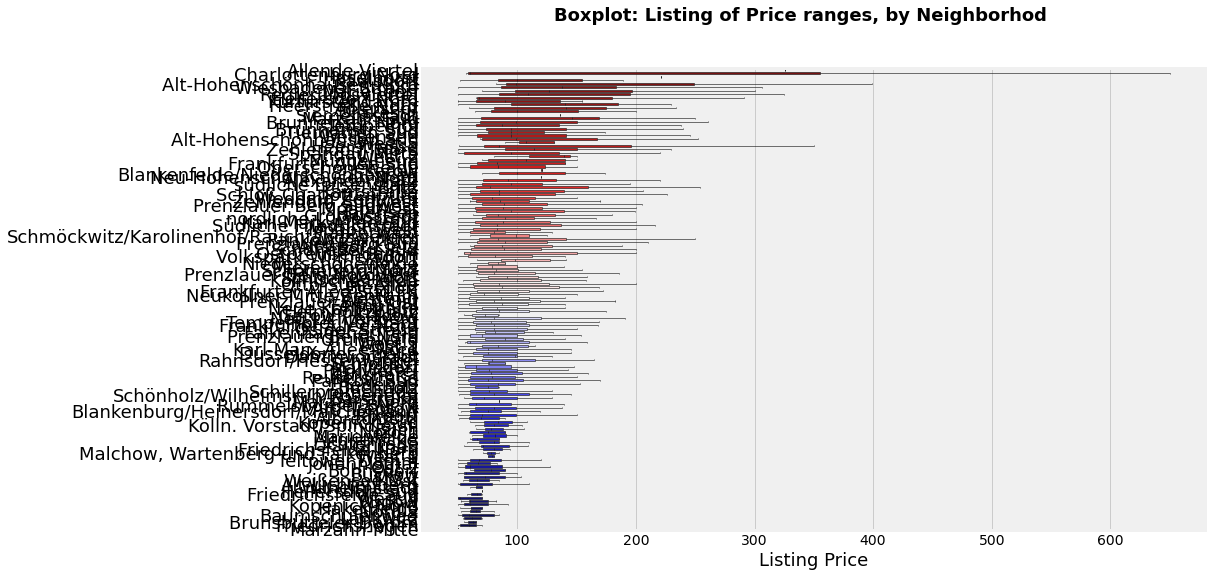

In [35]:
df_neighborhood_plot = df_print_berlin_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_berlin_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

fig.savefig('berlin_neighborhood_boxplot.png')

In [36]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [37]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_berlin)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 17499 files in the dataset
There is 7300 to be regressed with accommodates <=4


In [38]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  3.4724209352530693
Coefficients:  [ 4.43283972 15.09127531 -2.47218563  0.4097797  -1.57170484 -5.72947208
 10.14722721 13.7146845  -6.29710767]
LinearRegression()


In [39]:
y_pred2_4 = regr4.predict(X_4)

In [40]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(5837, 3)

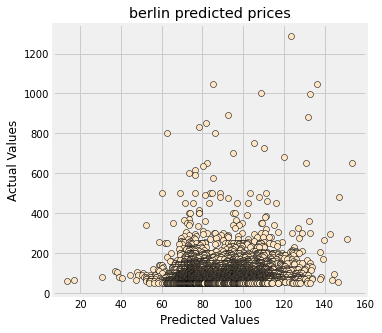

In [41]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('berlin predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [42]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_berlin)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 17499 files in the dataset
There is 4256 to be regressed with accommodates <=2


In [43]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  18.29924354445616
Coefficients:  [  0.937745    19.60742825  -2.37872794   0.35571631   3.04361223
 -11.8996268    7.5290147   12.55352432  -3.30893837]
LinearRegression()


In [44]:
y_pred2_2 = regr2.predict(X_2)

In [45]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(3215, 3)

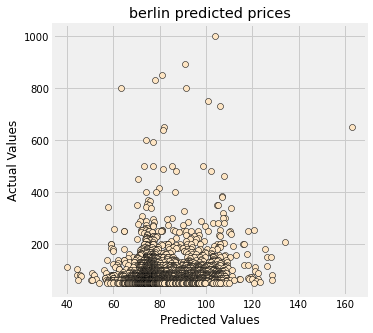

In [46]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('berlin predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [47]:
## Regression fucntion, rooms for 2 or less

In [48]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_berlin)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 17499 files in the dataset
There is 8307 to be regressed with accommodates <=6


In [49]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -15.329636894570285
Coefficients:  [ 5.65961768 22.3175662  -2.65725071  0.45209135 -0.08116229 -4.71404456
 12.08313094 14.19208761 -9.71930704]
LinearRegression()


In [50]:
y_pred6_6 = regr6.predict(X_6)

In [51]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(6785, 3)

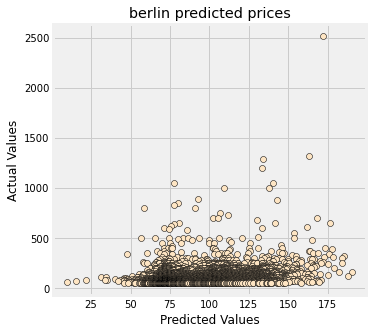

In [52]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('berlin predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [53]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_berlin)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 17499 files in the dataset
There is 8682 to be regressed


In [54]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -22.77124097487473
Coefficients:  [ 5.45211332 22.73493378 -1.20424979  0.43741819  0.1829057  -3.02468298
 12.46429346 13.09550698 -9.86057673]
LinearRegression()


In [55]:
y_predall_all = regrall.predict(X_all)

In [56]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(7138, 3)

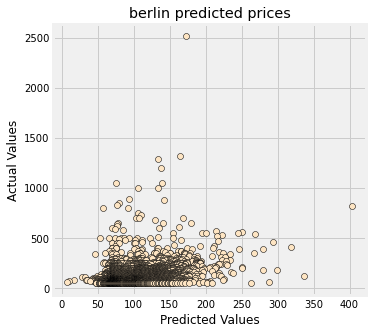

In [57]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('berlin predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [58]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
0,3176,Entire rental unit,Entire home/apt,4.0,1.0,2.0,90,0.0,4.63,4.68,4.53,4.92,4.63
2,9991,Entire rental unit,Entire home/apt,7.0,4.0,7.0,180,0.0,5.00,5.00,5.00,4.86,4.86
4,16644,Entire condominium (condo),Entire home/apt,5.0,1.0,3.0,90,0.0,4.72,4.86,4.86,4.67,4.71
6,20858,Entire loft,Entire home/apt,4.0,2.0,2.0,169,60.0,4.44,4.60,4.61,4.88,4.39
7,21869,Entire rental unit,Entire home/apt,4.0,1.0,2.0,70,0.0,4.74,4.70,4.91,4.62,4.58


In [59]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  -22.77124097487473
Coefficients:  [ 5.45211332 22.73493378 -1.20424979  0.43741819  0.1829057  -3.02468298
 12.46429346 13.09550698 -9.86057673]
Intercept:  18.29924354445616
Coefficients:  [  0.937745    19.60742825  -2.37872794   0.35571631   3.04361223
 -11.8996268    7.5290147   12.55352432  -3.30893837]
Intercept:  3.4724209352530693
Coefficients:  [ 4.43283972 15.09127531 -2.47218563  0.4097797  -1.57170484 -5.72947208
 10.14722721 13.7146845  -6.29710767]
Intercept:  -15.329636894570285
Coefficients:  [ 5.65961768 22.3175662  -2.65725071  0.45209135 -0.08116229 -4.71404456
 12.08313094 14.19208761 -9.71930704]


In [60]:
df_berlin_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
9601,9601,294,$294.00,173.037996,-120.962004,https://www.airbnb.com/rooms/26769591,52.54645,13.40542,3,Prenzlauer Berg Nordwest,4.95,4.95,4.76,4.95,5.00,4.90,4.76,21
517,517,170,$170.00,159.104293,-10.895707,https://www.airbnb.com/rooms/929443,52.52853,13.38713,4,Brunnenstr. Süd,4.95,4.99,4.99,4.99,4.97,4.96,4.79,181
11557,11557,204,$150.00,156.545058,-47.454942,https://www.airbnb.com/rooms/33792277,52.53857,13.39512,4,Brunnenstr. Nord,4.67,4.67,4.60,4.73,4.67,4.87,4.53,15
5185,5185,129,$129.00,152.557727,23.557727,https://www.airbnb.com/rooms/14618013,52.53129,13.34033,4,Moabit West,4.56,4.74,4.74,4.71,4.50,4.72,4.60,199
10326,10326,90,$90.00,151.329819,61.329819,https://www.airbnb.com/rooms/29299465,52.59237,13.39545,4,Blankenfelde/Niederschönhausen,4.90,4.95,4.98,4.93,4.90,4.79,4.83,43


## Find the highest predicted in berlin - <= 4

In [61]:
df_berlin_query_filter['% Diff'] = (df_berlin_query_filter['Actual']/df_berlin_query_filter['Predicted']-1)* 100
df_berlin_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_berlin_query_final = df_berlin_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_berlin_query_final)} listings that meet criteria')
df_berlin_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head()


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 1569 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
9601,294,173.04,69.90,4.95,4.95,4.76,4.90,4.76,Prenzlauer Berg Nordwest,https://www.airbnb.com/rooms/26769591,3,21
517,170,159.10,6.85,4.95,4.99,4.99,4.96,4.79,Brunnenstr. Süd,https://www.airbnb.com/rooms/929443,4,181
11557,204,156.55,30.31,4.67,4.67,4.60,4.87,4.53,Brunnenstr. Nord,https://www.airbnb.com/rooms/33792277,4,15
5185,129,152.56,-15.44,4.56,4.74,4.74,4.72,4.60,Moabit West,https://www.airbnb.com/rooms/14618013,4,199
10326,90,151.33,-40.53,4.90,4.95,4.98,4.79,4.83,Blankenfelde/Niederschönhausen,https://www.airbnb.com/rooms/29299465,4,43


## Find the best deal in berlin - <=4

In [62]:
df_berlin_deal = df_berlin_query_final[df_berlin_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_berlin_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
8832,52,134.90,-61.45,4.68,4.84,4.70,4.64,4.71,Köpenick-Nord,https://www.airbnb.com/rooms/23782669,4,104
16599,55,130.94,-58.00,4.88,4.94,4.88,4.94,4.69,Düsseldorfer Straße,https://www.airbnb.com/rooms/50526605,4,16
1871,50,117.90,-57.59,4.69,4.69,4.54,4.54,4.77,Alt Treptow,https://www.airbnb.com/rooms/5020064,4,19
2010,53,118.04,-55.10,4.88,4.92,4.88,4.84,4.82,Tempelhof,https://www.airbnb.com/rooms/5536095,3,128
1538,51,112.69,-54.74,4.59,4.81,4.74,4.74,4.58,Volkspark Wilmersdorf,https://www.airbnb.com/rooms/4066963,4,72
16869,63,138.14,-54.39,5.00,5.00,4.95,4.95,5.00,Alexanderplatz,https://www.airbnb.com/rooms/51150272,3,21
12451,50,106.63,-53.11,4.54,4.63,4.71,4.83,4.57,Prenzlauer Berg Nordwest,https://www.airbnb.com/rooms/37114153,2,63
